# Amazon Reviews NLP Project: Analysis of Consumer Sentiment

<img src="https://www.revuze.it/blog/wp-content/uploads/sites/2/2020/03/Amazon-Review-Analysis.png">

* Bu projede, Amazon'da satılan elektronik ürünlere ait **30000 yorumdan** oluşan bir veri setini kullanarak müşteri yorumlarının kapsamlı bir analizini gerçekleştiriyoruz. Amacımız, çeşitli **NLP** tekniklerini uygulayarak anlamlı içgörüler elde etmek ve tarihsel verilere dayanarak gelecek yorumların duygu durumunu tahmin eden bir model geliştirmektir.

## Objectives

1. **Text Preprocessing**: Yorumları işledik. Bu işlem, metni küçük harfe çevirme, noktalama işaretlerini kaldırma, HTML etiketlerini temizleme ve stopwords filtrer. Bu, verilerin daha etkili bir şekilde analiz edilmesini sağlar.

2. **Sentiment Analysis**: 'Overall' sütunundaki puanları kullanarak yorumları olumlu ve olumsuz olarak sınıflandırdık. Ardından, olumlu ve olumsuz yorumlarda en sık kullanılan kelimeleri görsel olarak temsil eden **word clouds** oluşturduk; bu, tüketici duygularını daha net bir şekilde anlamamıza yardımcı oldu.

3. **Classification Model Development**: **Machine Learning algoritmalarını** kullanarak, yeni yorumların puanını tahmin edebilen bir model geliştirdik.

4. **Named Entity Recognition (NER)**: Yorumlar içindeki anahtar varlıkları tanımlayıp sınıflandırmak için **NER** tekniğini inceledik. Bu yöntem, ürün isimleri ve özellikleri gibi ilgili bilgilerin çıkarılmasına yardımcı olarak analizimizi zenginleştirmektedir.

## Conclusion

Bu proje sayesinde,tüketici görüşlerine öngörü sahibi olup, aynı zamanda **NLP metodolojileri** konusunda yeteneklerimizi geliştirdik. Bu süreç, e-ticaret alanında müşteri duygularını anlamak ve tahmin etmek için .

In [160]:
#!pip install neattext
#!pip install tensorflow_hub
#!pip install scikit-learn
#!pip install nltk
#!pip install imbalanced-learn
#!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 117.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 81.4 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.7.6
    Uninstalling spacy-3.7.6:
      Successfully uninstalled spacy-3.7.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.7.1 requires spacy<3.8.0,>=3.7.2, but you have spacy 3.8.0 which is incompatible.


In [162]:
import pandas as pd
import numpy as np
import re
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import nltk
from textblob import TextBlob
import tensorflow_hub as hub
from sklearn.decomposition import LatentDirichletAllocation
import neattext as nt
import neattext.functions as nfx
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import LatentDirichletAllocation # metindeki temaları bulmak için çünkü topic modelling  yapacağız
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


In [163]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [104]:
df=pd.read_csv('amazon.csv', nrows=30000)  # İlk 30000 satırı okuyabildim, sorunlu satırlardan dolayı inmedi 400000 satır.

In [105]:
df.head()

,Unnamed: 0,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,447803,A22JRVAY052312,B001E1Y5O6,Omar Mohatarem,"[0, 0]",These come in extremely handy in trying to tam...,4,Very handy,1389484800,"01 12, 2014"
1,1361025,A2Y9Q058YCA6HJ,B0083EZE4M,Mama Melanie,"[0, 0]","I love this mouse! Very responsive, fast and ...",5,Perfect,1355529600,"12 15, 2012"
2,1018381,AUK9D8R1FDX0F,B004SBEVSY,Huckleberry,"[0, 0]",I bought this thinking it would mirror my lapt...,2,"Only does video, not mirror",1347840000,"09 17, 2012"
3,402313,ABVHVYB9VQEWD,B0016SN49Y,"V. A. Sawant ""Vinay""","[0, 0]","When I received this product, I was more than ...",5,"Best Product, Easy Set up and value for price",1316390400,"09 19, 2011"
4,1406589,A3LVKM4GN5BCGB,B008LTBITY,Sam Park,"[0, 1]",Never buy additional RAM as a build-to-order o...,5,"Works perfectly with newest ""thin"" iMac 27"" (l...",1362614400,"03 7, 2013"


<Axes: xlabel='overall', ylabel='count'>

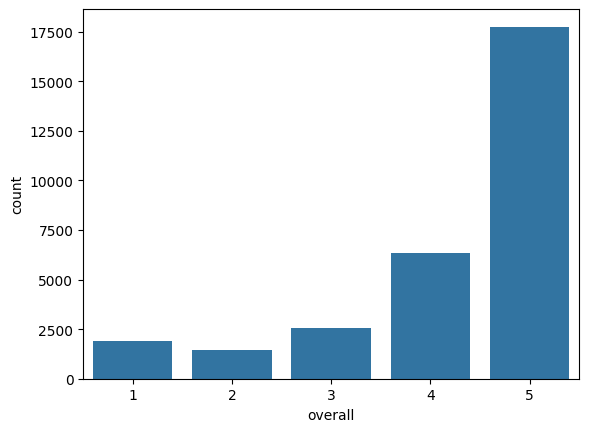

In [106]:
sns.countplot(x=df['overall']) 

* 5 olan yorumlar çoğunlukta, imbalanced data olabilir yani dengesiz data, daha sonra buna da bakacağım en sonda , SMOTE paketi gerekebilir.

In [108]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      30000 non-null  int64 
 1   reviewerID      30000 non-null  object
 2   asin            30000 non-null  object
 3   reviewerName    29566 non-null  object
 4   helpful         30000 non-null  object
 5   reviewText      29970 non-null  object
 6   overall         30000 non-null  int64 
 7   summary         30000 non-null  object
 8   unixReviewTime  30000 non-null  int64 
 9   reviewTime      30000 non-null  object
dtypes: int64(3), object(7)
memory usage: 2.3+ MB


In [109]:
del df['Unnamed: 0'] # gekersşz olduğunu düşünüp sildim

In [110]:
df.isnull().sum()

,0
reviewerID,0
asin,0
reviewerName,434
helpful,0
reviewText,30
overall,0
summary,0
unixReviewTime,0
reviewTime,0


In [111]:
df.drop(columns=['reviewerName', 'unixReviewTime', 'reviewerID'], inplace=True)

In [112]:
df.shape

(30000, 6)

In [113]:
df['reviewTime'] = pd.to_datetime(df['reviewTime'], format='%m %d, %Y', errors='coerce').dt.year

<Axes: xlabel='reviewTime', ylabel='count'>

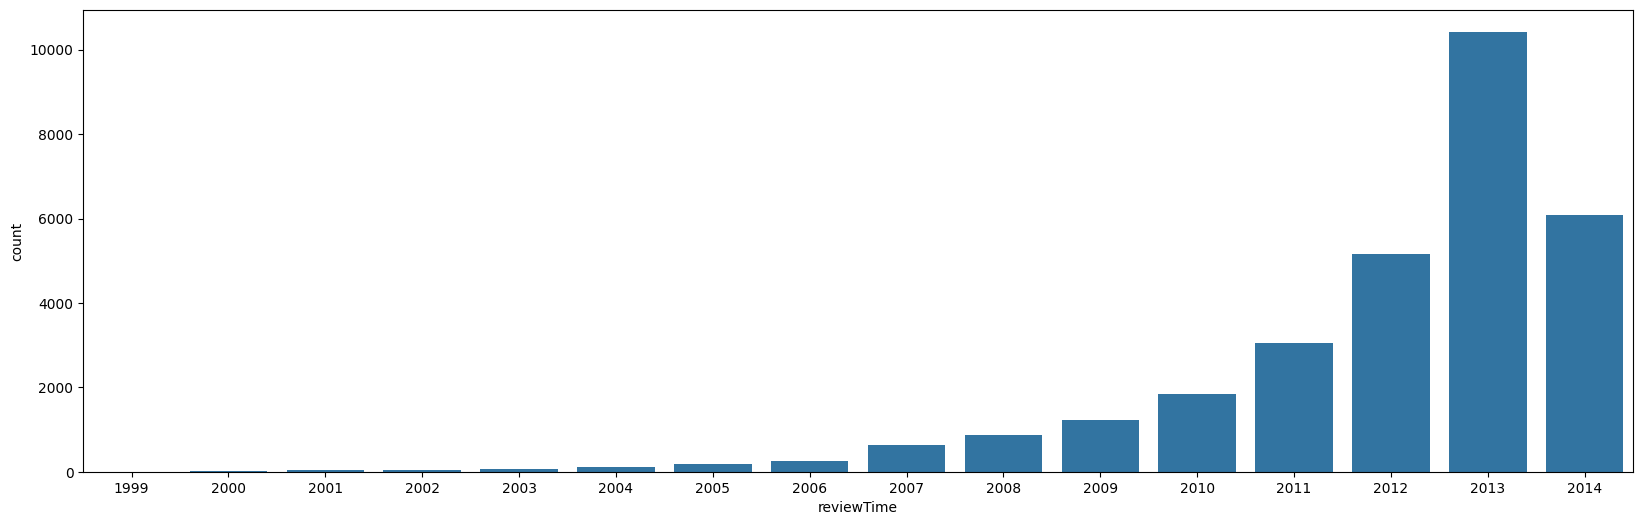

In [114]:
plt.figure(figsize=(20, 6))
sns.countplot(x=df['reviewTime'])

* Asin sutunu: amazondaki her ürün veritabanına bir kodla kayıtlıdır, bu aynı ürünün farklı versiyonları için karışıklığı önler ve takibini kolaylalştırır.
* mesela aşağıdaki asin kodlu ürün tüm yorumları hep 5 puan almış neredeyse

In [115]:
y_asin = 'B008LTBITY'   # bu asin kodlu ürünün tüm yorumlarını görmek istedim
filtered_reviews = df[df['asin'] == y_asin]
print(filtered_reviews)

             asin helpful                                         reviewText  \
4      B008LTBITY  [0, 1]  Never buy additional RAM as a build-to-order o...   
2176   B008LTBITY  [0, 0]  The memory was just as advertised. Easy to ins...   
3036   B008LTBITY  [1, 2]  I purchased this 16GB Crucial memory to replac...   
10401  B008LTBITY  [0, 0]  I overstretched my budget when I bought my Mac...   
10413  B008LTBITY  [1, 1]  I wanted to upgrade my Macbook Pro - 2012 - 13...   
18103  B008LTBITY  [1, 1]  I recently moved to my first Mac and wanted to...   
24226  B008LTBITY  [0, 0]  When inserting it in apple imac late 2013 27in...   
26154  B008LTBITY  [0, 0]  Works wonderfully in my Lenovo W530!  Passes a...   
27874  B008LTBITY  [0, 1]  nice ram. It went into my mac mini easily and ...   

       overall                                            summary  reviewTime  
4            5  Works perfectly with newest "thin" iMac 27" (l...        2013  
2176         4                         

In [116]:
# text sutunumda 30 tane boş yorum var, nan doldursam sorun olur işlerken, "no rewiev" ile dolduracağım
df['reviewText'] = df['reviewText'].fillna('No review')

In [117]:
df.isnull().sum()

,0
asin,0
helpful,0
reviewText,0
overall,0
summary,0
reviewTime,0


In [118]:
def remove_hashtags(text):
    return re.sub(r'#\w+', '', text)  # hashtags kaldır

In [119]:
def clean_text(text):
    text = remove_hashtags(text)
    text = nfx.remove_numbers(text)
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    text = re.sub(r'[\[\]{}()$=~%/\\:;\'\"`<>?@#&^*+-]', ' ', text)
    text = nfx.remove_stopwords(text)
    text = text.lower()
    text = re.sub(r'\s+', ' ', text).strip()
    return text
df['cleaned_reviewText'] = df['reviewText'].apply(clean_text)

In [120]:
df.head()

,asin,helpful,reviewText,overall,summary,reviewTime,cleaned_reviewText
0,B001E1Y5O6,"[0, 0]",These come in extremely handy in trying to tam...,4,Very handy,2014,come extremely handy trying tame wilderness ca...
1,B0083EZE4M,"[0, 0]","I love this mouse! Very responsive, fast and ...",5,Perfect,2012,love mouse responsive fast feels great hand sp...
2,B004SBEVSY,"[0, 0]",I bought this thinking it would mirror my lapt...,2,"Only does video, not mirror",2012,bought thinking mirror laptop told work asus g...
3,B0016SN49Y,"[0, 0]","When I received this product, I was more than ...",5,"Best Product, Easy Set up and value for price",2011,received product glad find required wires hd c...
4,B008LTBITY,"[0, 1]",Never buy additional RAM as a build-to-order o...,5,"Works perfectly with newest ""thin"" iMac 27"" (l...",2013,buy additional ram build order option apple us...


## WORD CLOUD

* owerall 4-5 olanları pozitif, 0-1 olanları negatife atadık ki wordcloud yapacağım.

In [121]:
pozitif=df[(df['overall'] == 4) | (df['overall'] == 5)]['cleaned_reviewText']
negatif=df[(df['overall'] == 0) | (df['overall'] == 1)]['cleaned_reviewText']

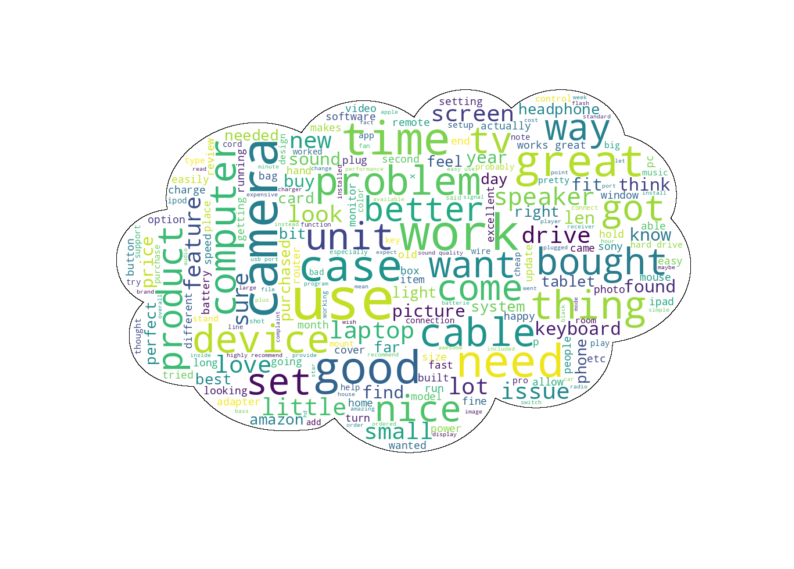

In [122]:
def wc(data, bgcolor):
    plt.figure(figsize=(10, 10))  # Kare boyut
    mask = np.array(Image.open('cloud.png'))  # Maske resmi

    wc = WordCloud(
        background_color=bgcolor,
        stopwords=STOPWORDS,
        mask=mask,
        contour_color='black',  # Kenar rengi
        contour_width=1,  # Kenar kalınlığı
        width=800,  # Genişlik
        height=800,  # Yükseklik
        max_words=300,  # En fazla gösterilecek kelime sayısı
        min_font_size=10,  # Minimum font boyutu
        max_font_size=100,  # Maximum font boyutu
    ).generate(' '.join(data))

    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')  # Eksenleri kapatma
    plt.show()

# Pozitif incelemeleri kullanarak Word Cloud oluşturma
wc(pozitif, 'white')

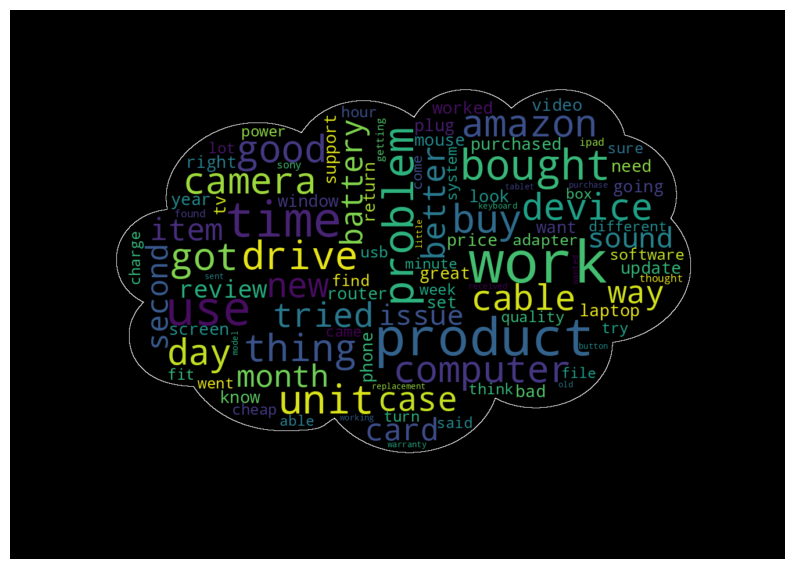

In [123]:
def wc_negatif(data, bgcolor):
    plt.figure(figsize=(10, 10))  # Kare boyut
    mask = np.array(Image.open('cloud.png'))  # Maske resmi

    wc = WordCloud(
        background_color=bgcolor,
        stopwords=STOPWORDS,
        mask=mask,
        contour_color='white',  # Kenar rengi
        contour_width=1,  # Kenar kalınlığı
        width=800,  # Genişlik
        height=800,  # Yükseklik
        max_words=100,  # En fazla gösterilecek kelime sayısı
        min_font_size=10,  # Minimum font boyutu
        max_font_size=100,  # Maximum font boyutu
    ).generate(' '.join(data))

    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')  # Eksenleri kapatma
    plt.show()

# Negatif incelemeleri kullanarak Word Cloud oluşturma
wc_negatif(negatif, 'black')

In [30]:
df.head()

,asin,helpful,reviewText,overall,summary,reviewTime,cleaned_reviewText
0,B001E1Y5O6,"[0, 0]",These come in extremely handy in trying to tam...,4.0,Very handy,2014.0,come extremely handy trying tame wilderness ca...
1,B0083EZE4M,"[0, 0]","I love this mouse! Very responsive, fast and ...",5.0,Perfect,2012.0,love mouse responsive fast feels great hand sp...
2,B004SBEVSY,"[0, 0]",I bought this thinking it would mirror my lapt...,2.0,"Only does video, not mirror",2012.0,bought thinking mirror laptop told work asus g...
3,B0016SN49Y,"[0, 0]","When I received this product, I was more than ...",5.0,"Best Product, Easy Set up and value for price",2011.0,received product glad find required wires (exc...
4,B008LTBITY,"[0, 1]",Never buy additional RAM as a build-to-order o...,5.0,"Works perfectly with newest ""thin"" iMac 27"" (l...",2013.0,buy additional ram buildtoorder option apple u...


In [124]:
df['overall'] = df['overall'].fillna(0).astype(int) # bu sutunu inte çevirelim.

In [125]:
df.head()

,asin,helpful,reviewText,overall,summary,reviewTime,cleaned_reviewText
0,B001E1Y5O6,"[0, 0]",These come in extremely handy in trying to tam...,4,Very handy,2014,come extremely handy trying tame wilderness ca...
1,B0083EZE4M,"[0, 0]","I love this mouse! Very responsive, fast and ...",5,Perfect,2012,love mouse responsive fast feels great hand sp...
2,B004SBEVSY,"[0, 0]",I bought this thinking it would mirror my lapt...,2,"Only does video, not mirror",2012,bought thinking mirror laptop told work asus g...
3,B0016SN49Y,"[0, 0]","When I received this product, I was more than ...",5,"Best Product, Easy Set up and value for price",2011,received product glad find required wires hd c...
4,B008LTBITY,"[0, 1]",Never buy additional RAM as a build-to-order o...,5,"Works perfectly with newest ""thin"" iMac 27"" (l...",2013,buy additional ram build order option apple us...


In [126]:
df['cleaned_reviewText'].tolist() # Tüm yorumları listeye çevirdi

['come extremely handy trying tame wilderness cables tv velcro looks straps look pretty thin small place pretty secure good value',
 'love mouse responsive fast feels great hand spot sides thumb ring pinky fingers rubberized took minute like',
 'bought thinking mirror laptop told work asus g work shows media mirror xbox thing better returned item minutes spent setting minutes trying hold connection wife laptop away junk',
 'received product glad find required wires hd cable help neatly written instructions comes box hook compuer new lcd mins definitely like recommend product thanks amazaon nice shopping experience',
 'buy additional ram build order option apple user upgradable general rule apple charges twice retail considering ram place new thin imac came late ridiculously easy user upgradable ram slot special tools necessary button depressed located power cord plugs center imac push button cover right opens open pull tabs slides ram receptacles mind cover comes completely slides new 

In [127]:
df.isnull().sum()

,0
asin,0
helpful,0
reviewText,0
overall,0
summary,0
reviewTime,0
cleaned_reviewText,0


* Bu fonksiyonla ekleri kaldırıp kökleri bulacak yani **lemmatize** edecek mesela "running" kelimesi  "run" , "thinking" kelimesi  "think" olarak  dönecek, text analizinde bu önemli.

In [128]:
def kokbul(text):
    words = TextBlob(text).words
    return [word.lemmatize() for word in words]

In [129]:
df['lematize_review'] = df['cleaned_reviewText'].apply(kokbul) # metini köklere ayır
print(df[['cleaned_reviewText', 'lematize_review']].head())
# fakat hala köklere ayrılmadı,sadece vigül koydu aralarına

                                  cleaned_reviewText  \
0  come extremely handy trying tame wilderness ca...   
1  love mouse responsive fast feels great hand sp...   
2  bought thinking mirror laptop told work asus g...   
3  received product glad find required wires hd c...   
4  buy additional ram build order option apple us...   

                                     lematize_review  
0  [come, extremely, handy, trying, tame, wildern...  
1  [love, mouse, responsive, fast, feel, great, h...  
2  [bought, thinking, mirror, laptop, told, work,...  
3  [received, product, glad, find, required, wire...  
4  [buy, additional, ram, build, order, option, a...  


## MODELING

In [131]:
x=df[['cleaned_reviewText']]
y=df[['overall']]

* Yorumları *vector* e çevirdik yani, o kelime o yorumda/cümlede kaç kere keçiyorsa o sayıyı alır. *stopwords* kaldırdık, yani cümleye fazla katkısı olamayan durak kelimeler, "the", "are"," and" gibi ve *ngram* yaptık yani kelimenin önündeki ve arkasındaki 1-2 kelimeye bakarak gerçekte ne anlamifade ettiğini tesbit ettik.

In [132]:
# Listeyi birleştirerek dize haline getirme
df['cleaned_reviewText'] = df['cleaned_reviewText'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
vect = CountVectorizer(stop_words='english', ngram_range=(1, 2), max_features=100000, analyzer=lemmafn) # CountVectorizer nesnesini oluştur
x = vect.fit_transform(df['cleaned_reviewText'])  # Metinle ile fit et
features = vect.get_feature_names_out()
print(features[50:])  # 51. textten itibaren listele

['abit' 'abject' 'abkmawoth' ... 'zyxel' 'zz' 'zztop']


In [138]:
# Listeyi birleştirerek dize haline getirme
df['cleaned_reviewText'] = df['cleaned_reviewText'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x) # Listeyi dize haline getirme
x = df['cleaned_reviewText']
y = df['overall']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # Eğitim ve test setlerine ayırma
vect = CountVectorizer(stop_words='english', ngram_range=(1, 2), max_features=100000, analyzer=lemmafn) # Vektör oluşturma
x_train_vect = vect.fit_transform(x_train) # Eğitim verilerini vektörleştirme
x_test_vect = vect.transform(x_test) # Test verilerini vektörleştirme

<class 'pandas.core.series.Series'>
0    come extremely handy trying tame wilderness ca...
1    love mouse responsive fast feels great hand sp...
2    bought thinking mirror laptop told work asus g...
3    received product glad find required wires hd c...
4    buy additional ram build order option apple us...
Name: cleaned_reviewText, dtype: object


In [154]:
pd.DataFrame(x_train_vec.toarray(),columns=vect.get_feature_names_out()).sample(2)

,__,____,______,_______,_____________________________________________________,__________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________cpu,______________________________________________________________________________________________________________________________________________my,______________________________________________________________________________________________________________________update,________________________________________________________________________update,_______________________________________________________still,...,zvetco,zvox,zvu,zw,zwhich,zx,zyxel,zyxels,zz,zztop
6209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## SMOTE ile Oversampling

* SMOTE kullanıp oversampling yapacağım şimdi, modellemeden önce, çünkü modelim başarısız oldu %58 başarı gösterdi, data imbalanced olduğu için diye düşünüyorum, aslında bunu graifkte gördüm ama bu işlemi train test splitten sonra yapmamız lazım çünkü datayı dengeleme train verisinde yapılır. SMOTE paketiyle çok az örnek olan data için sentetik data üretip dengeleyeceğiz.

In [143]:
over = SMOTE()
x_train_resampled, y_train_resampled = over.fit_resample(x_train_vect, y_train)

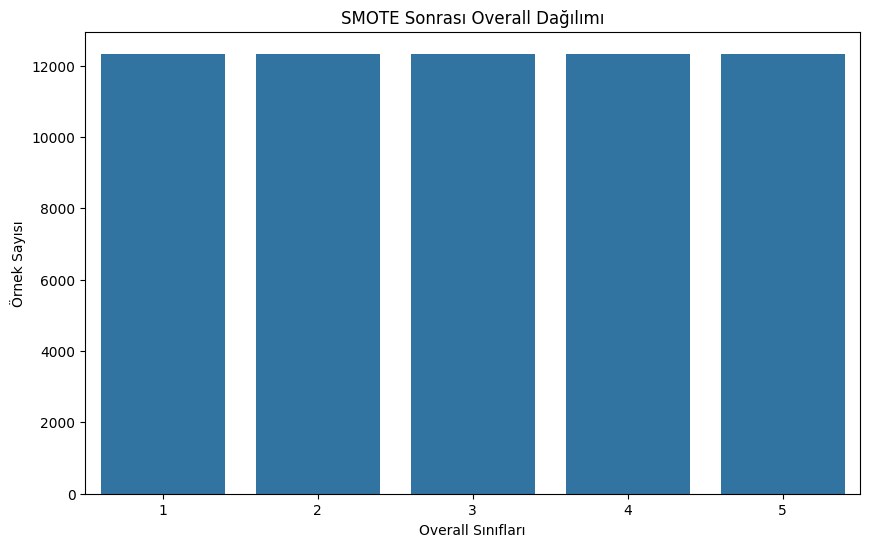

In [145]:
plt.figure(figsize=(10, 6))
sns.countplot(x=y_train_resampled)
plt.title('SMOTE Sonrası Overall Dağılımı')
plt.xlabel('Overall Sınıfları')
plt.ylabel('Örnek Sayısı')
plt.xticks(rotation=0)
plt.show()

In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

b = BernoulliNB()
l = LogisticRegression()
d = DecisionTreeClassifier()
r = RandomForestClassifier()
gb= GradientBoostingClassifier()
kn= KNeighborsClassifier()
ab= AdaBoostClassifier()
mn= MultinomialNB()

def algo_test(x_resampled, y_resampled):
    modeller = [b, l, d, r, gb, kn, ab, mn]
    isimler = ["BernoulliNB", "LogisticRegression", "DecisionTreeClassifier",
              "RandomForestClassifier", "GradientBoostingClassifier", "KNeighborsClassifier",
              "AdaBoostClassifier", "MultinomialNB"]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=42)

    # x_train_vect and y_train_vect will be used in your algo_test function
    x_train_vect = x_train
    y_train_vect = y_train

    x_test_vect = x_test
    y_test_vect = y_test

    accuracy = []
    precision = []
    recall = []
    f1 = []
    mdl = []

    print("Veriler hazır modeller deneniyor")
    for model in modeller:
        print(model, " modeli eğitiliyor!..")
        model = model.fit(x_train_vect, y_train)
        tahmin = model.predict(x_test_vect)
        mdl.append(model)
        accuracy.append(accuracy_score(y_test_vect, tahmin))
        precision.append(precision_score(y_test_vect, tahmin, average="micro"))
        recall.append(recall_score(y_test_vect, tahmin, average="micro"))
        f1.append(f1_score(y_test_vect, tahmin, average="micro"))
        print(confusion_matrix(y_test_vect, tahmin))

    print("Eğitim tamamlandı.")

    metrics = pd.DataFrame(columns=["Accuracy", "Precision", "Recall", "F1", "Model"], index=isimler)
    metrics["Accuracy"] = accuracy
    metrics["Precision"] = precision
    metrics["Recall"] = recall
    metrics["F1"] = f1
    metrics["Model"] = mdl

    metrics.sort_values("F1", ascending=False, inplace=True)

    print("En başarılı model: ", metrics.iloc[0].name)
    model = metrics.iloc[0, -1]
    tahmin = model.predict(np.array(x_test_vect) if model == kn else x_test_vect)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test_vect, tahmin))
    print("classification Report:")
    print(classification_report(y_test_vect, tahmin))
    print("Diğer Modeller:")

    return metrics.drop("Model", axis=1)

In [147]:
algo_test(x_resampled, y_resampled)

Veriler hazır modeller deneniyor
BernoulliNB()  modeli eğitiliyor!..
[[  40    7   28   76  422]
 [  10    0   31  117  259]
 [  15    5   49  183  497]
 [   8    2   71  467 1300]
 [  17    6  117  739 4534]]
LogisticRegression()  modeli eğitiliyor!..
[[ 240   87   47   43  156]
 [  83   64   60   92  118]
 [  57   60  129  188  315]
 [  41   39  148  556 1064]
 [  73   56  153  632 4499]]
DecisionTreeClassifier()  modeli eğitiliyor!..
[[ 143   68   45  104  213]
 [  46   41   49  102  179]
 [  55   78   71  189  356]
 [  66   88  143  488 1063]
 [ 151  129  253  985 3895]]
RandomForestClassifier()  modeli eğitiliyor!..
[[  51    0    0   20  502]
 [  11    0    1   28  377]
 [   8    0    0   51  690]
 [   2    1    2  111 1732]
 [   5    0    1   86 5321]]
GradientBoostingClassifier()  modeli eğitiliyor!..
[[ 139    4    9   29  392]
 [  54    3    3   58  299]
 [  34    2   16  118  579]
 [  12    6   10  254 1566]
 [  25   11    9  169 5199]]
KNeighborsClassifier()  modeli eğitili

,Accuracy,Precision,Recall,F1
AdaBoostClassifier,0.625889,0.625889,0.625889,0.625889
GradientBoostingClassifier,0.623444,0.623444,0.623444,0.623444
LogisticRegression,0.609778,0.609778,0.609778,0.609778
MultinomialNB,0.609333,0.609333,0.609333,0.609333
RandomForestClassifier,0.609222,0.609222,0.609222,0.609222
KNeighborsClassifier,0.567889,0.567889,0.567889,0.567889
BernoulliNB,0.565556,0.565556,0.565556,0.565556
DecisionTreeClassifier,0.515333,0.515333,0.515333,0.515333


                   Classifier Methods   Accuracy  Precision         F1  \
0          LogisticRegression  TF-IDF  63.777778  57.335446  57.946349   
1        KNeighborsClassifier  TF-IDF  49.577778  47.003557  47.868465   
2      DecisionTreeClassifier  TF-IDF  51.333333  50.003908  50.628480   
3      RandomForestClassifier  TF-IDF  60.933333  57.478123  47.561062   
4          AdaBoostClassifier  TF-IDF  62.166667  54.364423  54.162438   
5  GradientBoostingClassifier  TF-IDF  62.555556  55.303973  53.234699   
6               MultinomialNB  TF-IDF  60.144444  36.173542  45.176143   
7                 BernoulliNB  TF-IDF  57.155556  50.131682  51.214059   

      Recall  
0  63.777778  
1  49.577778  
2  51.333333  
3  60.933333  
4  62.166667  
5  62.555556  
6  60.144444  
7  57.155556  


In [ ]:
# model %63 başarı,

# NER (Named Entity Recognition)

In [164]:
import spacy
from spacy import displacy
NER = spacy.load('en_core_web_sm')

* extract_entities fonksiyonuyla text için NER uyguluyoruz ve bunun sonucu bir sutuna ekleniyor, yorumlardaki tüm ürün adları bu sutunda toplanmış oluyor.

In [168]:
def extract_entities(text):
    doc = NER(text)
    return [(ent.text, ent.label_) for ent in doc.ents]
df['entities'] = df['reviewText'].apply(extract_entities)
# çok uzun sürüyor

In [169]:
print(df)

             asin   helpful  \
0      B001E1Y5O6    [0, 0]   
1      B0083EZE4M    [0, 0]   
2      B004SBEVSY    [0, 0]   
3      B0016SN49Y    [0, 0]   
4      B008LTBITY    [0, 1]   
...           ...       ...   
29995  B002BET3FG  [10, 10]   
29996  B0037TRWTI    [0, 0]   
29997  B0045DIO6A    [0, 1]   
29998  B00I054WFQ  [24, 27]   
29999  B000F28DP2    [1, 2]   

                                              reviewText  overall  \
0      These come in extremely handy in trying to tam...        4   
1      I love this mouse!  Very responsive, fast and ...        5   
2      I bought this thinking it would mirror my lapt...        2   
3      When I received this product, I was more than ...        5   
4      Never buy additional RAM as a build-to-order o...        5   
...                                                  ...      ...   
29995  The other reviews say it all: the cord is shor...        4   
29996  This backpack notebook case is great.  It fits...        5   
29997 

In [ ]:
for index, row in df.iterrows():
    doc = NER(row['reviewText'])
    displacy.render(doc, style='ent', jupyter=True)
    # çok uzun sürdü 3 saat

* Bu kodu çalıştırmadan yükledim githuba çünkü çok büyük çıktı var, dosya boyutu artınca github kabul etmedi.

* Bu fonksiyon ile yorum sutunundaki her bir satır NER modeline gönderildi ve yorumlardaki varlıklar mesela elktronik ürün markaları fiyatlar rakamlar para birimleri etiketlendi. Hangi türde tanımladıysa ayrı bir renkte görüntüledi. 50 gibi sayılar *CARDINAL* .Lenovo gibi isimler *ORG* olarak gösterildi. Bu tür analizler metinlerdeki önemli bilgilerin hızlı bir şekilde anlaşılmasını sağlar.